# Declaration of Originality

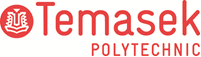

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* <bl>Student Name (Matric Number) </bl> : Cai Jiale (2403847C)
* Tutorial Group                : PC01
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding

**1.Problem Background & Motivation:** 

The real estate market in Ames, Iowa, faces a lack of accessible, data-driven tools to help users make confident pricing decisions. Buyers often risk overpaying due to emotional bidding or misinformation. Sellers may undervalue their properties or face long listing times due to unrealistic pricing. Real estate agents need fast, consistent estimations to serve clients efficiently. Meanwhile, market participants, including investors, lack transparency into the key factors that affect property prices.


**2.Goal:** 
- Provide a streamlined, accurate price prediction tool that makes housing price insights more accessible to non-technical users.
- Enable interactive feature selection and simulation, so users can explore how different property characteristics (e.g., area, quality, basement size) influence the final price.
- Improve pricing strategy accuracy for sellers and agents to reduce time-on-market and negotiation disputes.
- Empower buyers to make better-informed investment decisions or first-home purchases based on predicted price fairness.

**3.Stakeholders:**
- Home buyers (mainstream users)
- Real estate agents (consultative users)
- Sellers & investors (financial decision-makers)
- Market analysts & urban planners (secondary/extended users)

**4.Business Success Criteria：**
- Users can predict house prices with <15% deviation from actual market sale prices.
- Stakeholders use the tool to validate or adjust pricing decisions in at least 80% of test scenarios.
- Streamlit app receives positive user feedback on clarity, usefulness, and relevance during UAT (User Acceptance Testing).
- The model ranks key influencing factors clearly (e.g., quality, size), supporting educational and business communication purposes.

**5.Constraints and Considerations**
- Model needs to work with limited features during deployment (not all users know MSSubClass or GarageFinish).
- Predictions should remain interpretable, avoiding black-box overfitting, especially for educational or advisory use.
- Deployment limitations: The Streamlit app must remain lightweight, responsive, and accessible on most devices.
- The primary goal of this project is to accurately predict house sale prices in Ames, Iowa, using a real-world dataset of property characteristics. This model is implemented into a user-friendly Streamlit web app, where stakeholders can interactively filter features (e.g., house size, neighborhood, garage type) and instantly receive a price prediction. This allows:

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
# Load train and test data
FILEPATH = pd.read_csv("train.csv")
df = FILEPATH
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

I used df.info() to quickly understand the overall structure of the dataset, including the number of entries (rows), number of features (columns), data types, and presence of missing values.

From the output, I observed that the dataset contains 1460 rows and 81 features. Some features, like ‘Alley’, have a large number of missing values (only 91 non-null entries), which means I may need to either fill or drop them depending on their importance.

Understanding the data types helps me decide how to handle each feature properly — for instance, I know that object-type features are likely to be categorical and may require encoding (like One-Hot Encoding) before modeling.

This step also helps me plan my data preprocessing, such as handling missing values, deciding which columns to transform, and choosing the right type of visualizations (e.g., bar chart for categorical features, histograms for numerical ones).

In short, df.info() gives me a foundation to clean and prepare my data effectively, and ensures I don’t go into modeling blindly without knowing the shape and quality of my data.

In [4]:
## Describe data distribution
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


我使用了 df.describe(include='all') 来对整个数据集进行更全面的描述性统计分析。这个函数不仅对数值型变量提供均值、标准差、最小值、最大值、四分位数等统计信息，也能对分类型（object）变量提供独特值数量、最高频类别及其频数。这一步的目的是帮助我识别出变量的分布特性、异常值、数据偏斜、缺失严重的特征，以及哪些变量属于分类变量，便于后续进行编码、标准化、特征工程或删除处理。

Eg1. LotArea（地块面积） – 识别异常值和偏态分布

该列均值为 10516.82，标准差为 9981.26，最小值仅 1300，而最大值高达 215245。

这表明数据分布极不均衡且存在严重离群值，which I will use histogram and box plot to double check and understand, and 对数变换（log transform） 或 去除离群点will help to避免对模型造成影响。

Eg2.Street（街道类型） – 信息量低的类别型变量

虽然该列无缺失，但只有 2 个唯一值，且最多的类别 "Pave" 占据了 1454 条记录。

这说明该特征分布极不均衡，大多数街道为铺设路（Pave），信息增益非常低，可能对模型贡献有限。
MSZoning and Street, I used bar charts to examine the frequency of each category, and confirmed that most properties are located in RL zones

      Column  Missing_Count
      PoolQC           1453
 MiscFeature           1406
       Alley           1369
       Fence           1179
  MasVnrType            872
 FireplaceQu            690
 LotFrontage            259
  GarageType             81
 GarageYrBlt             81
GarageFinish             81
  GarageQual             81
  GarageCond             81
BsmtFinType2             38
BsmtExposure             38
BsmtFinType1             37
    BsmtCond             37
    BsmtQual             37
  MasVnrArea              8
  Electrical              1


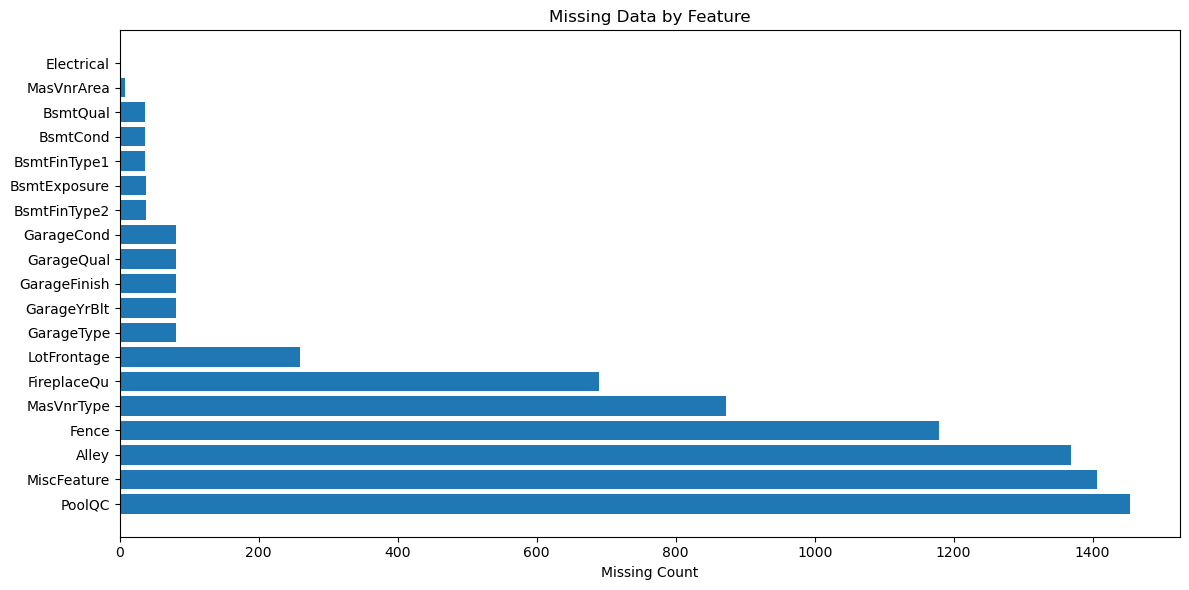

In [5]:
# Check for missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum()
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(missing_data['Column'], missing_data['Missing_Count'])
plt.xlabel('Missing Count')
plt.title('Missing Data by Feature')
plt.tight_layout()
plt.show()

In [6]:
# Feature types which are numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#I excluded the Id column (which is just an identifier) and SalePrice (target variable) from the feature list to avoid data leakage.
numerical_features = [f for f in num_cols if f not in ['Id', 'SalePrice']]

feature_df = pd.DataFrame({
    'Numerical Features': pd.Series(numerical_features),
    'Categorical Features': pd.Series(cat_cols)
})

feature_df

,Numerical Features,Categorical Features
0,MSSubClass,MSZoning
1,LotFrontage,Street
2,LotArea,Alley
3,OverallQual,LotShape
4,OverallCond,LandContour
5,YearBuilt,Utilities
6,YearRemodAdd,LotConfig
7,MasVnrArea,LandSlope
8,BsmtFinSF1,Neighborhood
9,BsmtFinSF2,Condition1


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

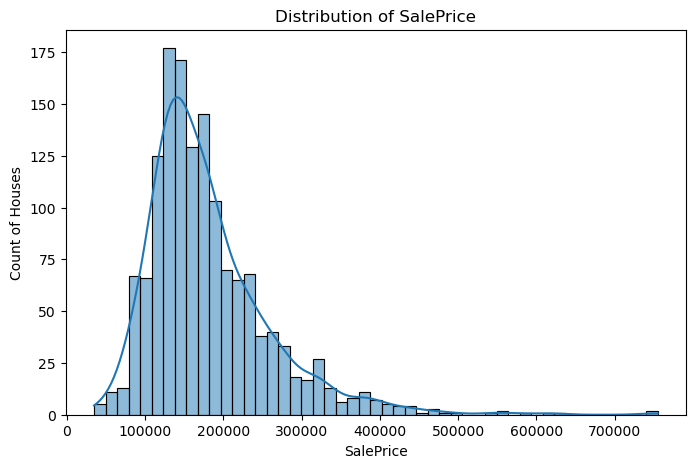

In [7]:
## Understanding distribution of target
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count of Houses")
plt.show()


Text(0.5, 1.0, 'Box Plot of SalePrice')

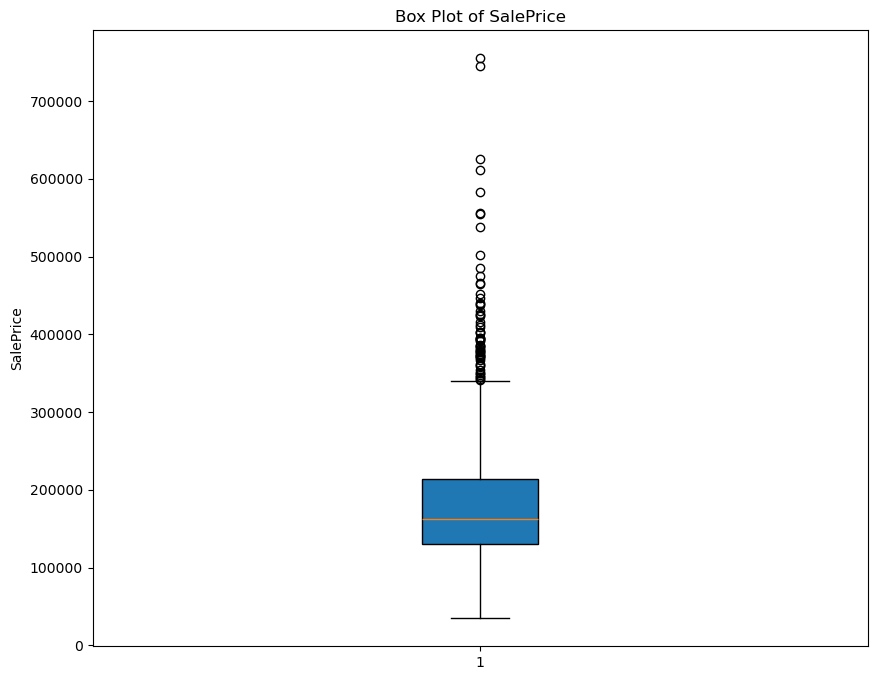

In [ ]:
target_col = 'SalePrice' 

fig, axes = plt.subplots(figsize=(10, 8))
axes.boxplot(df[target_col], vert=True, patch_artist=True)
axes.set_ylabel(target_col)
axes.set_title(f'Box Plot of SalePrice')

1. **mean=$180,921.20 VS median=$163,000**
    - The fact that the mean is significantly higher than the median confirms the distribution’s positive skewness (right-skewed).
    - This skew is primarily caused by a small number of extremely expensive homes—luxury properties or custom-built estates—pulling the average upward.
    - Example: In a neighborhood of 10 homes, if 9 are priced around $150,000 and 1 is $750,000, the average becomes distorted, even though the majority remain mid-priced.

2. **Mode ≈ $150,000 (from histogram peak)**
    - The most frequent house price lies closer to $150k, showing that most buyers transact in this mid-range bracket, well below the mean.

3. **std：79,442.50**
    - A high standard deviation (~44% of the mean) indicates wide variability in home prices, further validating a heterogeneous market.
    - Homes priced above $214k form the upper quartile, possibly representing upgrade purchases, “dream homes,” or higher-end segments.

4. **$IQR = Q3 - Q1 = \$84,025$**
    - This means that the most crucial 50% of the transactions in Ames City are concentrated within the range of $130,000 to $214,000. 
    - This range captures the middle 50% of home prices, meaning most typical transactions lie between $130k and $214k.
    - The dividing line between new construction and improvement: Houses priced above $214,000 account for only 25%, which can be defined as the "improved" or "high-end" housing market in this city.

- The **SalePrice target** contains 1460 valid entries with no missing values. This ensures that the observed distribution is indeed **right-skewed (Positive Skew)** rather than distorted due to incomplete data.

- The prices of most of the houses in the picture are concentrated in the range of $100k - $200k, which indicates that the residents in Ames predominantly middle-income households. Therefore, the As a result, property developers tend to focus on constructing mid-to-loe-priced residences that cater to the mainstream population, as this price range is generally sufficient to meet the basic housing needs of most families. And, only small group of wealthy individuals can afford high-end properties. 

- This pattern can also be explained by the urban and economic context of the dataset. The data originates from Ames, Iowa, a medium-sized city where demand for high-end or luxury housing is naturally limited. Most households in the city belong to the middle-income bracket, which results in a relatively narrow market for expensive properties. Furthermore, the dataset primarily consists of typical residential homes, with fewer investment-oriented or luxury properties included, reinforcing the dense clustering in the affordable price range.

- At 2010 (when the dataset is collected), Amesn may possess a large amount of undeveloped plain land as only when the land supply is abundant will developers build a large number of mid-to-low priced detached houses. if the land is scarce, the price distribution will shift to the right as a whole, and the median will be closer to the mean.

- The existence of the minimum value of $34,900$ implies a clear age gap in the housing market. Such extremely low prices are usually not "cheap houses", but rather "houses in need of renovation" or "dilapidated houses with only land value". This reflects that Ames, as a mature city, has a considerable proportion of old communities, which contrasts sharply with the newly developed high-priced areas (Outliers).

- Outliers don’t invalidate the model, but highlight the need for careful preprocessing and possibly segmented modeling if luxury pricing is analyzed separately. The fact that no lower outliers exist (very few below $35k) suggests no data entry errors on the lower end. The min value of $34,900 likely represents dilapidated properties, houses sold primarily for land, or aging structures requiring full renovation. This may show that Ames likely includes older neighborhoods or aging communities, consistent with its identity as a mature Midwestern city.

1. **mean=$180,921.20 VS median=$163,000**
    - The fact that the mean is significantly higher than the median confirms the distribution’s positive skewness (right-skewed).
    - This skew is primarily caused by a small number of extremely expensive homes—luxury properties or custom-built estates—pulling the average upward.
    - Example: In a neighborhood of 10 homes, if 9 are priced around $150,000 and 1 is $750,000, the average becomes distorted, even though the majority remain mid-priced.

2. **Mode ≈ $150,000 (from histogram peak)**
    - The most frequent house price lies closer to $150k, showing that most buyers transact in this mid-range bracket, well below the mean.

3. **std：79,442.50**
    - A high standard deviation (~44% of the mean) indicates wide variability in home prices, further validating a heterogeneous market.
    - Homes priced above $214k form the upper quartile, possibly representing upgrade purchases, “dream homes,” or higher-end segments.

4. **$IQR = Q3 - Q1 = \$84,025$**
    - This means that the most crucial 50% of the transactions in Ames City are concentrated within the range of $130,000 to $214,000. 
    - This range captures the middle 50% of home prices, meaning most typical transactions lie between $130k and $214k.
    - The dividing line between new construction and improvement: Houses priced above $214,000 account for only 25%, which can be defined as the "improved" or "high-end" housing market in this city.

- The **SalePrice target** contains 1460 valid entries with no missing values. This ensures that the observed distribution is indeed **right-skewed (Positive Skew)** rather than distorted due to incomplete data.

- The prices of most of the houses in the picture are concentrated in the range of $100k - $200k, which indicates that the residents in Ames predominantly middle-income households. Therefore, the As a result, property developers tend to focus on constructing mid-to-loe-priced residences that cater to the mainstream population, as this price range is generally sufficient to meet the basic housing needs of most families. And, only small group of wealthy individuals can afford high-end properties. 

- This pattern can also be explained by the urban and economic context of the dataset. The data originates from Ames, Iowa, a medium-sized city where demand for high-end or luxury housing is naturally limited. Most households in the city belong to the middle-income bracket, which results in a relatively narrow market for expensive properties. Furthermore, the dataset primarily consists of typical residential homes, with fewer investment-oriented or luxury properties included, reinforcing the dense clustering in the affordable price range.

- At 2010 (when the dataset is collected), Amesn may possess a large amount of undeveloped plain land as only when the land supply is abundant will developers build a large number of mid-to-low priced detached houses. if the land is scarce, the price distribution will shift to the right as a whole, and the median will be closer to the mean.

- The existence of the minimum value of $34,900$ implies a clear age gap in the housing market. Such extremely low prices are usually not "cheap houses", but rather "houses in need of renovation" or "dilapidated houses with only land value". This reflects that Ames, as a mature city, has a considerable proportion of old communities, which contrasts sharply with the newly developed high-priced areas (Outliers).

Text(0.5, 1.0, 'Box Plot of SalePrice')

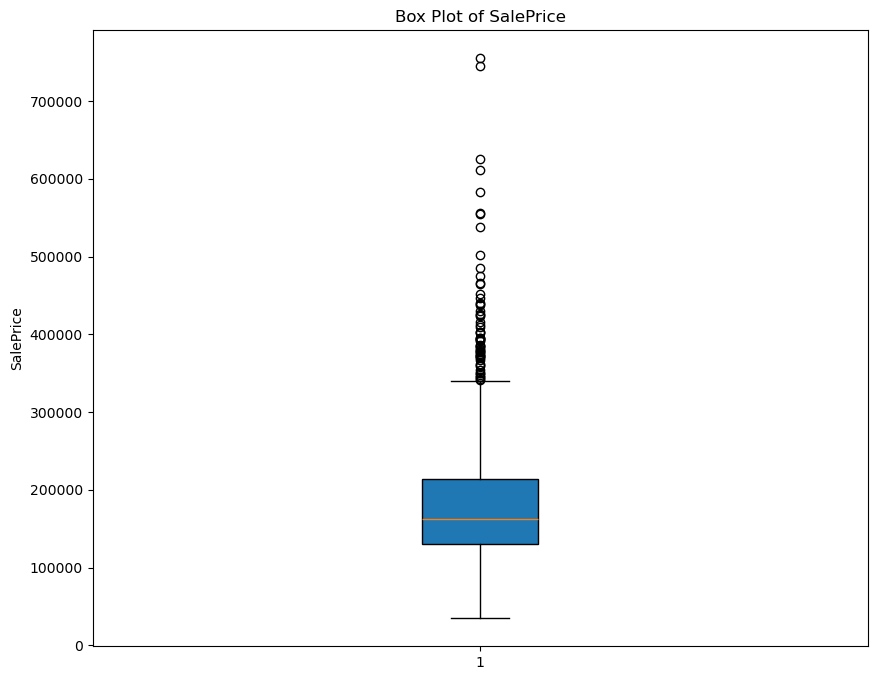

In [8]:
target_col = 'SalePrice' 

fig, axes = plt.subplots(figsize=(10, 8))
axes.boxplot(df[target_col], vert=True, patch_artist=True)
axes.set_ylabel(target_col)
axes.set_title(f'Box Plot of SalePrice')

#分析：
#从箱线图中可以看出，SalePrice存在一些异常值，这些异常值位于箱线图的上方，远离箱体和须的位置
#这些异常值可能代表价格异常高的房屋，可能是由于特殊的地理位置、豪华装修或其他独特的特征所致。
#在进行进一步的数据分析或建模时，可能需要考虑如何处理这些异常值，以避免对模型性能产生负面影响。
#但是没有明显的下界异常值，说明低价房屋的数据相对集中，没有极端的低价情况。

#M:
#median显示中位数为163000，mean均值为180921.2，mean大于median，说明数据分布右偏，有一些高价房屋拉高了均值。

#std显示标准差为79442.5，说明房价的波动较大，存在较大的差异性。
#--波动大是因为：房价覆盖范围广泛 （见min，max）

#min和max分别显示最小值为34900，最大值为755000，说明房价范围较广，从低价到高价都有涉及。
#--房价覆盖范围非常广泛，
#--同一数据集中同时存在：极低价房 & 极高价豪宅
#--这也是为什么：会出现大量 outliers & 均值容易被“拉偏”

#25%分位数为129975，50%分位数为163000，75%分位数为214000，说明大部分房屋的价格集中在这个范围内。
#--一半房子集中在 13 万～21 万， 主流市场价格区间清晰 & 高价房并不是大多数

#summary：存在少量的非常昂贵的豪宅，说明它们不是主流房价
#但是影响力较大，导致mean大于median，数据右偏

#solution：
#可以考虑对SalePrice进行对数变换，以减小高价房屋对均值的影响，使数据分布更加接近正态分布
#用median 更能代表整体房价水平
#在建模时，可以考虑使用鲁棒回归方法，以减少异常值对模型的影响

### 2.3.1.2 Understanding distribution of features

In [9]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [10]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
## Clean data

## 3.2 Train-Test Split

In [12]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [13]:
## Initialise and train model


# 5. Model Evaluation

In [14]:
## Evaluate model


In [15]:
## New data

## Predict


## Iterative model development


In [16]:
## Further feature engineering / feature selection